<a href="https://colab.research.google.com/github/riteshchail/oibsip_taskno.5/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

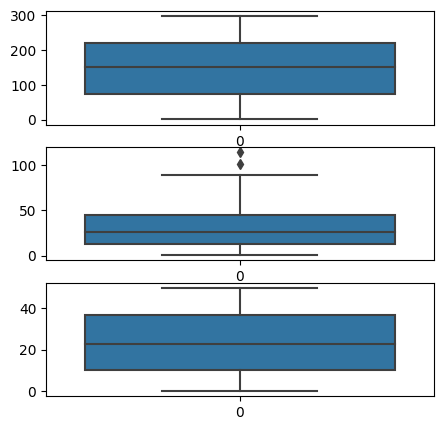

In [ ]:
fig,axs =plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df["TV"],ax =axs[0])
plt2 = sns.boxplot(df["Newspaper"],ax=axs[1])
plt3 = sns.boxplot(df["Radio"],ax=axs[2])

<ipython-input-9-aa98d7564d5a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Newspaper"])


<Axes: xlabel='Newspaper', ylabel='Density'>

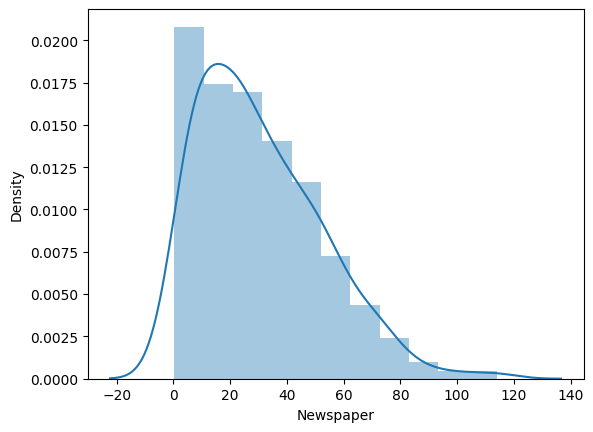

In [ ]:
sns.distplot(df["Newspaper"])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.25) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
61.275000000000006


In [ ]:
data = df.copy()


In [ ]:
data.loc[data["Newspaper"]>93, "Newspaper"] =93

<Axes: >

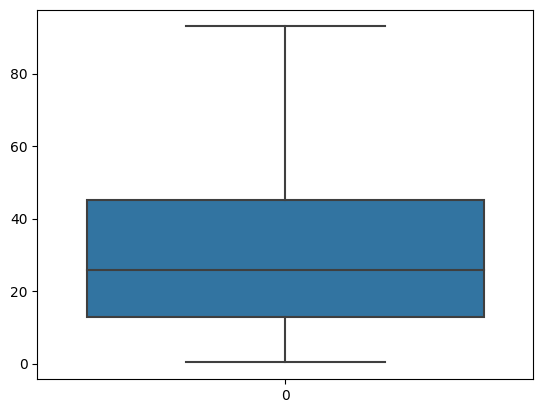

In [ ]:
sns.boxplot(data["Newspaper"])

<Axes: >

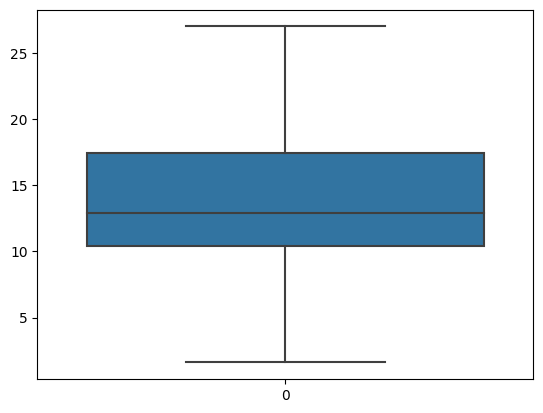

In [ ]:
sns.boxplot(data["Sales"])

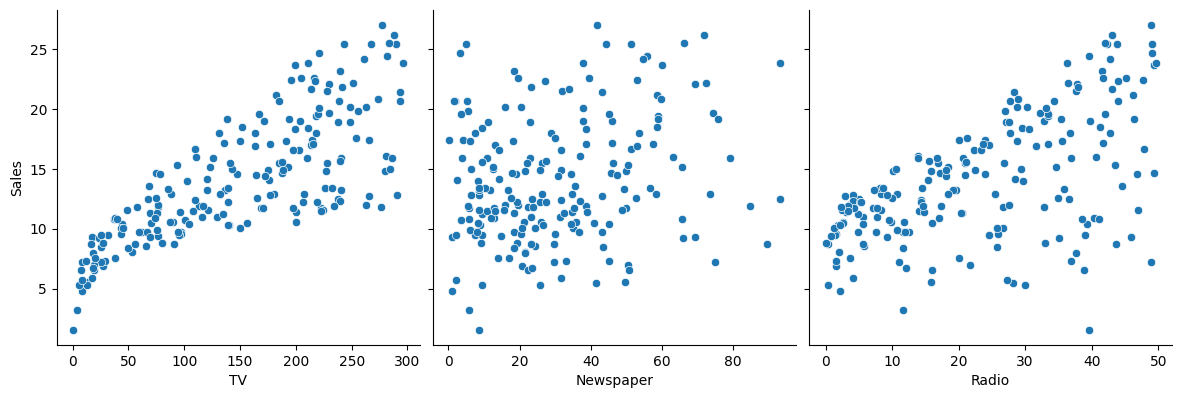

In [ ]:
sns.pairplot(data,x_vars=["TV","Newspaper","Radio"],y_vars="Sales",height=4,aspect=1,kind="scatter")
plt.show()

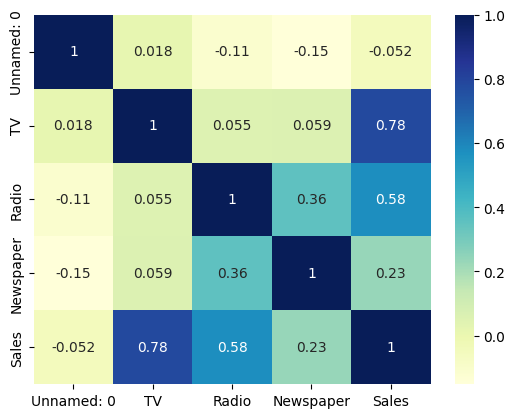

In [ ]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
important_features = list(df.corr()["Sales"][(df.corr()["Sales"]>+0.5)|(df.corr()["Sales"]<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data["TV"]
y = data["Sales"]

In [ ]:
x = x.values.reshape(-1,1)
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape,y_train.shape)

(160, 1) (160,)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(x_train)

In [ ]:
knn_test_pred = knn.predict(x_test)

In [ ]:
print(knn_train_pred,knn_test_pred)

[ 6.06 20.16 19.98 13.9  13.74  6.98 19.16 12.44 15.36  9.6  14.28 12.54
 12.28 19.88 16.12 15.28 20.82  9.94  8.18 18.44  9.6  14.66 11.34 13.74
 18.44 20.82 15.68  8.64 18.72 17.78  4.44 12.4  14.84 18.3  15.92  6.56
  6.98 14.74 18.3   9.72  6.06 20.22 11.32  9.94 14.92 19.44 17.36 19.74
 11.26 12.1  18.26  8.18 14.08 19.98 13.4  15.82  6.22 14.8  10.2  14.92
  6.98 19.98 11.54  8.64  6.98 10.2  16.98 13.76 14.52 13.7  10.36  9.1
 16.12 13.1  14.52 16.12 12.1  12.6   9.72 14.36  5.26 12.1  12.54 15.68
 21.3   6.06 11.28 17.36 16.32 15.46 16.32 18.72 17.24  9.92  6.46 14.1
 14.68 17.78 12.66 12.1  16.52  6.98  8.64 21.16 16.5   8.64 14.32 19.98
 19.98 13.7  14.84 17.4  10.88 20.86 12.28 13.7  12.54 10.88 16.04 19.4
 12.44 16.52  9.94 13.6  15.68 10.12 19.72 10.88 11.34 18.84 21.3  18.9
 19.76 20.86  4.44  9.6  10.36 16.32 11.34 19.4  18.78 17.78 16.32 19.16
 16.52 15.82 15.76 11.28  6.56 20.54 20.82 18.72 19.74 17.36 19.72 10.88
 13.1  16.12 10.48 14.68] [19.98 17.36 15.46 13.74  6.4

In [ ]:
Results = pd.DataFrame(columns=["model","train r2","testr2","test RMSE","Variance"])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"model":"K-Nearest neighbors","train r2":r2_train,"testr2":r2,"test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5008667769785407
RMSE: 3.6192734077436035


In [ ]:
Results.head(5)

,model1,train r2,testr2,test RMSE,Variance,model
0,NaN,0.692281,0.500867,3.619273,0.191414,K-Nearest neighbors
1,NaN,0.692281,0.500867,3.619273,0.191414,K-Nearest neighbors
2,NaN,0.692281,0.500867,3.619273,0.191414,K-Nearest neighbors
3,NaN,0.692281,0.500867,3.619273,0.191414,K-Nearest neighbors
4,K-Nearest neighbors,0.692281,0.500867,3.619273,0.191414,NaN


In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)

In [ ]:
model = sm.OLS(y_train,x_train_constant).fit()

In [ ]:
model.params

const    7.161940
x1       0.047117
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     252.7
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.35e-34
Time:                        15:39:06   Log-Likelihood:                -415.15
No. Observations:                 160   AIC:                             834.3
Df Residuals:                     158   BIC:                             840.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1619      0.503     14.244      0.0

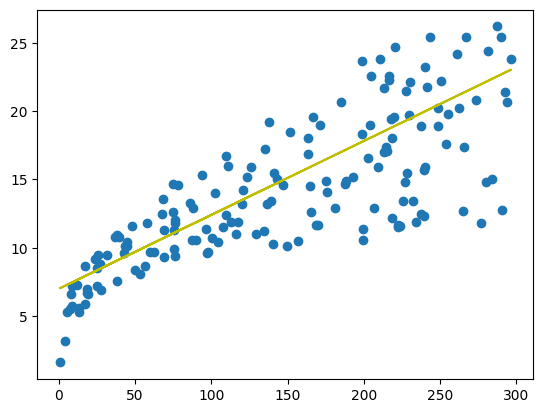

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541*x_train,"y")
plt.show()

In [ ]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

56    -2.005897
183    5.487112
36     5.662441
118    2.815410
157   -4.120118
         ...   
86     1.243006
7      0.374555
55     7.166420
24    -0.397351
145   -3.472503
Name: Sales, Length: 160, dtype: float64

In [ ]:
y_train_pred

array([ 7.50589706, 20.71288765, 19.7375587 , 13.08459019, 14.2201181 ,
        7.97235873, 17.27803351, 12.62755199, 17.80103599,  9.97013397,
       15.23314093, 11.38836593, 10.41303698, 17.37697993, 16.543003  ,
       15.02111289, 21.12752024,  9.02307543,  8.4246852 , 18.00364056,
        9.80993502, 13.65942175, 11.75588118, 14.30021758, 20.42076013,
       20.99559169, 16.03884745,  8.36814439, 17.97537015, 18.4653905 ,
        7.19492261, 11.19989656, 13.53220493, 17.45707941, 18.43712009,
        7.77917763,  8.07601688, 14.10232475, 17.45236767,  9.6827182 ,
        7.55772613, 17.31101565, 11.58625876,  8.95239941, 15.18131185,
       20.05795661, 16.26501069, 19.12032153, 12.00089136, 10.70045275,
       17.03773507,  8.45766734, 12.96208511, 19.65745922, 12.22234286,
       17.64083704,  7.71321336, 14.54051602,  9.18798612, 15.09650064,
        7.95822353, 19.67630615, 10.84651651,  8.33987399,  8.04774647,
        9.19269785, 17.86700027, 13.89500845, 15.44045723, 12.33

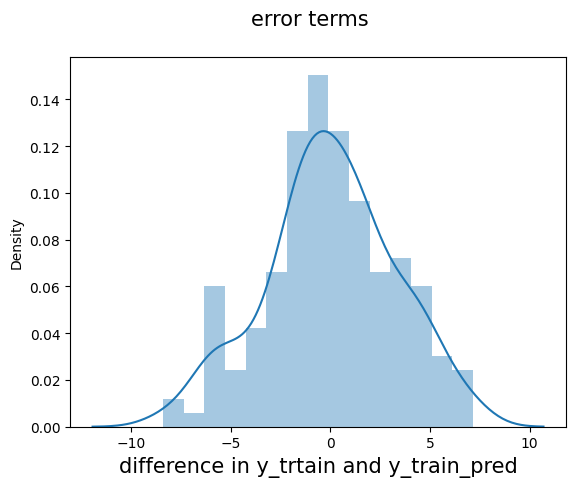

In [ ]:
fig = plt.figure()
sns.distplot(res,bins =15)
fig.suptitle("error terms",fontsize=15)
plt.xlabel("difference in y_trtain and y_train_pred",fontsize=15)
plt.show()

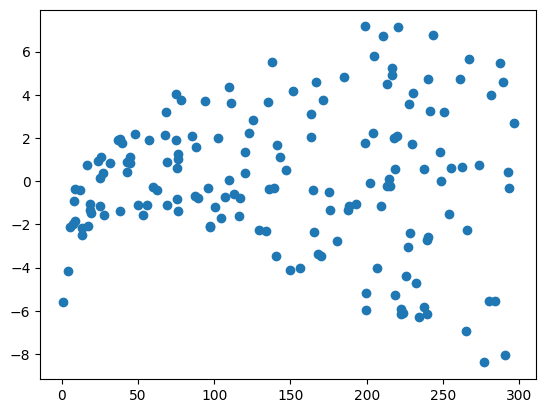

In [ ]:
plt.scatter(x_train,res)
plt.show()

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [ ]:
y_pred

array([19.54908933, 20.2087321 , 15.76556688, 14.21540637,  7.5671496 ,
       13.72067429, 15.50170977, 20.387778  , 11.60039396, 10.48842472,
       10.27639669, 15.28968174, 11.67106997, 17.55131409, 16.16606427,
       16.36866884, 16.28856936, 15.50170977, 18.38529102, 16.01057705,
       10.31409056, 16.47232699, 15.87393676, 13.33902383,  8.50949641,
       10.94075119,  7.97235873, 16.47232699, 13.73480949, 13.36729424,
       10.62035327, 17.08956415, 18.47481397, 20.6374999 , 20.52441828,
        8.08544035, 11.42134807,  8.00534087, 12.86313869, 16.90580652])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.2538950154819126

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.5965583163329957

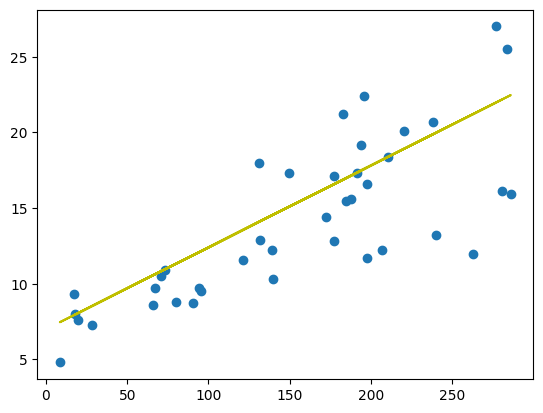

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541 * x_test,"y")
plt.show()